## Import data

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import re

# Download latest version
path = kagglehub.dataset_download("raghadalharbi/all-products-available-on-sephora-website")
files = os.listdir(path)
print("Path to dataset files:", path)
print("Files in dataset directory:", files)


100%|██████████| 4.64M/4.64M [00:00<00:00, 88.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/raghadalharbi/all-products-available-on-sephora-website/versions/1
Files in dataset directory: ['sephora_website_dataset.csv']


In [ ]:
csv_file_path = os.path.join(path, "sephora_website_dataset.csv")
data = pd.read_csv(csv_file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data Exploration

***Column Descriptions***
- **id**: Unique identifier for each product.
- **brand**: Brand name of the product.
- **category**: Product category, e.g., skincare, fragrance.
- **name**: Name of the product.
- **size**: Product size information.
- **rating**: Customer rating of the product (scale 0–5).
- **number_of_reviews**: Number of customer reviews.
- **love**: "Love" metric, indicating user engagement.
- **price**: Product price in USD.
- **value_price**: Listed value price, if different from sale price.
- **MarketingFlags**: Boolean flag for marketing purposes.
- **MarketingFlags_content**: Additional marketing information.
- **options**: Available product options, such as colors or sizes.
- **details**: Detailed product description.
- **how_to_use**: Instructions for using the product.
- **ingredients**: List of ingredients for applicable products.
- **online_only**: Indicator if the product is only available online.
- **exclusive**: Indicator if the product is exclusive to Sephora.
- **limited_edition**: Flag for limited-edition items.
- **limited_time_offer**: Flag for limited-time offers.


In [ ]:
data.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [ ]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64


***Missing Data Summary***

The dataset has no missing values in any column, as confirmed by the analysis.


In [ ]:
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
count_name = len(pd.unique(data['name']))
print("Unique Products:", count_name)

count_category = len(pd.unique(data['category']))
print("Unique Categories:", count_category)

count_brand = len(pd.unique(data['brand']))
print("Unique Brands:", count_brand)

Unique Products: 9106
Unique Categories: 143
Unique Brands: 324


In [ ]:
# Selecting numerical columns for standardization
numerical_features = ['price','number_of_reviews', 'love']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

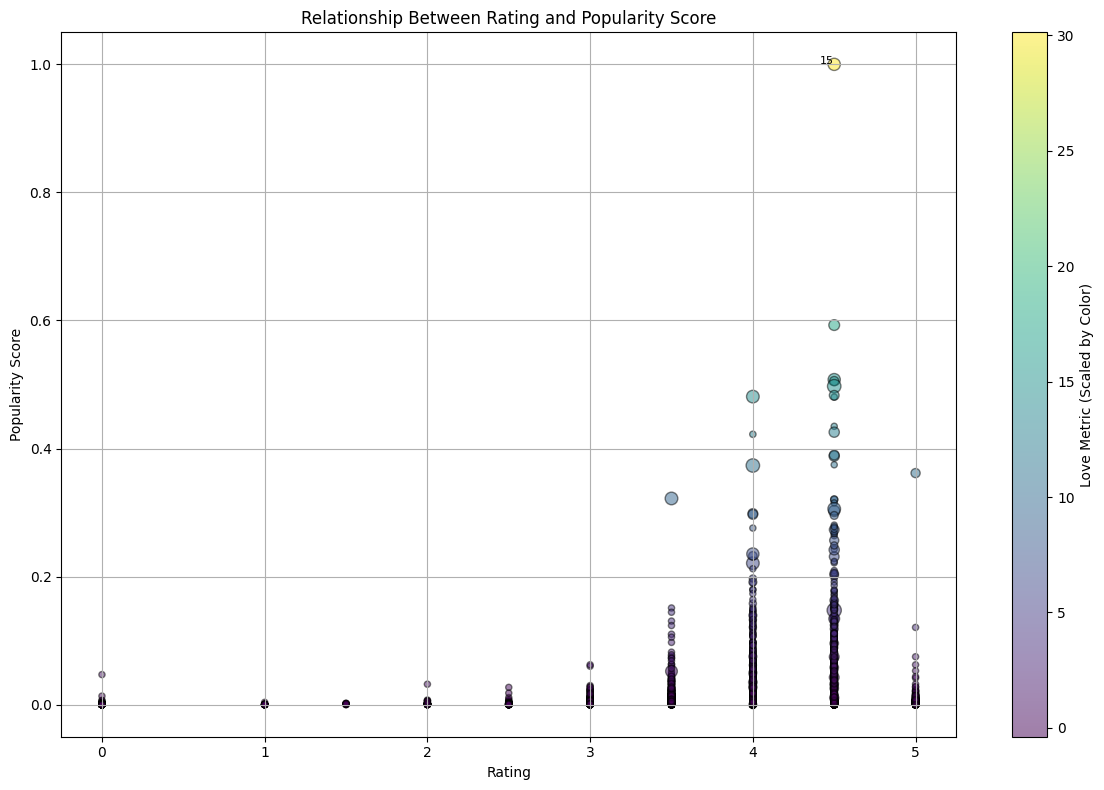

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Extract relevant columns
rating = data['rating']
love = data['love']
reviews = data['number_of_reviews']

# Ensure no NaN or invalid values in 'reviews'
reviews = reviews.fillna(0)  # Replace NaN with 0
reviews = np.maximum(reviews, 1)  # Replace negatives or 0 with a minimum size of 1

# Calculate popularity score (scaled love metric)
scaler = MinMaxScaler()
popularity_score = scaler.fit_transform(love.values.reshape(-1, 1)).flatten()

# Create a scatter plot to visualize rating vs. popularity score
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rating,
    popularity_score,
    c=love,
    s=[max(20, r * 5) for r in reviews],  # Adjusted size scaling
    cmap='viridis',
    alpha=0.5,  # Increase transparency
    edgecolor='k'
)
plt.colorbar(scatter, label='Love Metric (Scaled by Color)')
plt.xlabel('Rating')
plt.ylabel('Popularity Score')
plt.title('Relationship Between Rating and Popularity Score')
plt.grid(True)

# Add annotations only for points with high popularity scores
for i, txt in enumerate(reviews):
    if popularity_score[i] > 0.8:  # Annotate products with high popularity scores
        plt.annotate(
            int(txt),  # Display the review count as integer
            (rating.iloc[i], popularity_score[i]),
            fontsize=8,
            ha='right'
        )

plt.tight_layout()
plt.show()





### Target Variable Analysis: Rating
- Ratings are mostly positive, centered around higher values (e.g., 4 and above), indicating high customer satisfaction.
- Few low ratings suggest potential issues in specific product categories.

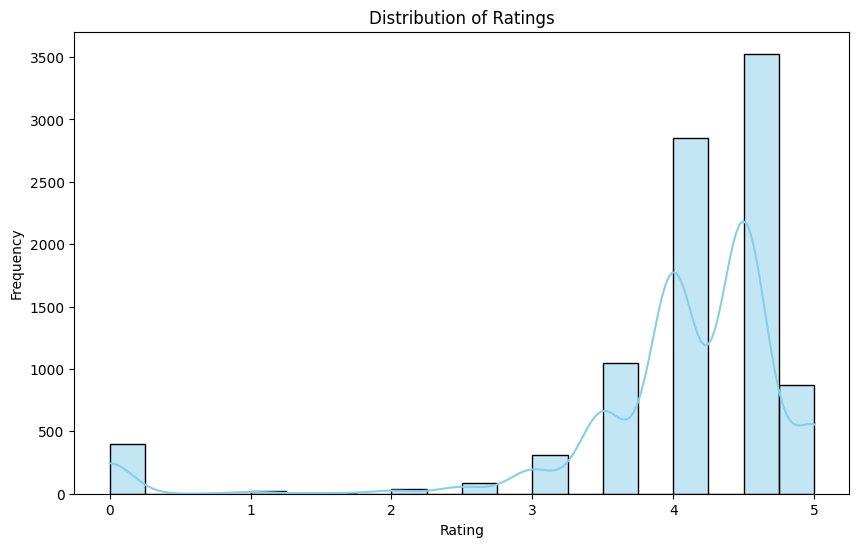

In [ ]:
# Analyze target variable (e.g., `rating`)
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Explanation
print("Ratings Summary:")
print(data['rating'].describe())

Ratings Summary:
count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64


## Plot the Data and Visualization

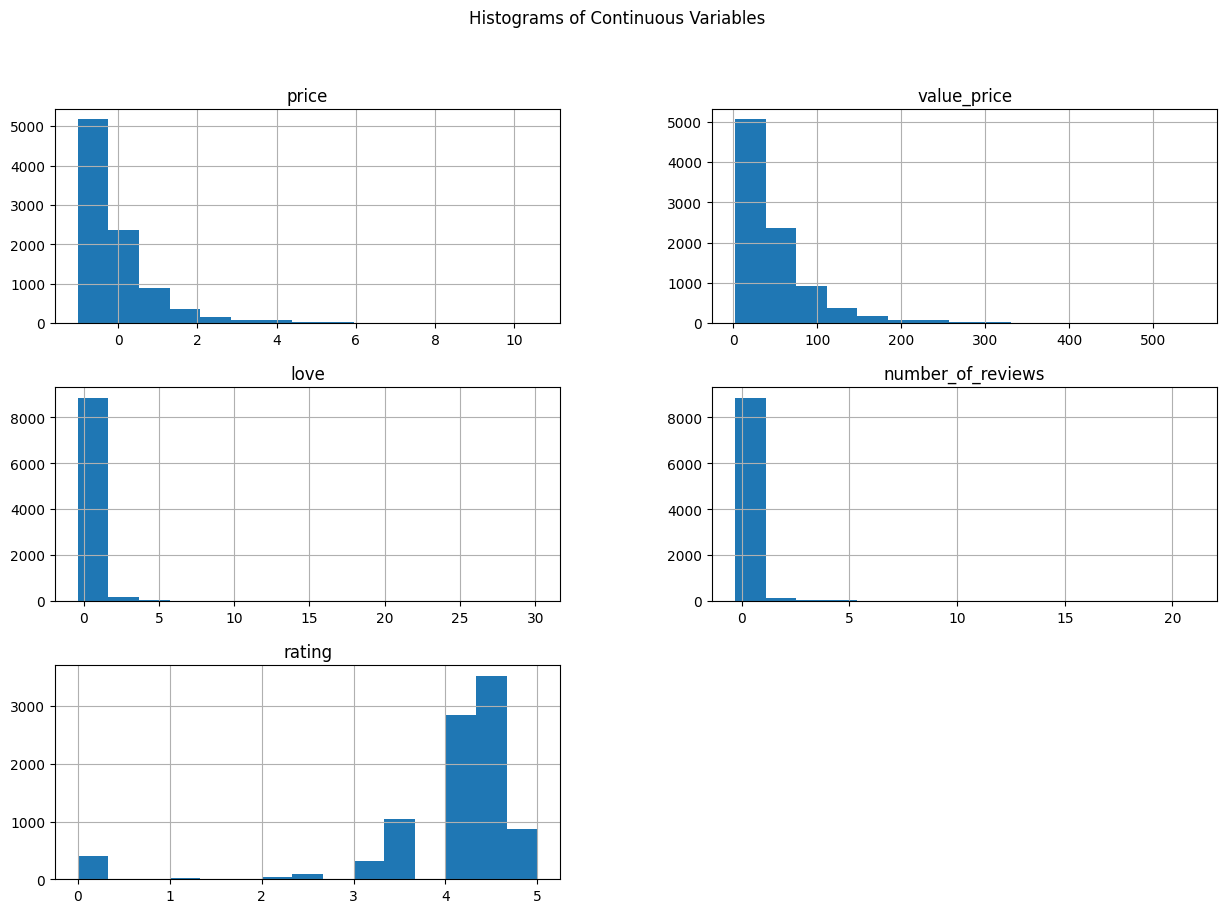

In [ ]:
# Histograms for continuous variables
numeric_columns = ['price', 'value_price', 'love', 'number_of_reviews', 'rating']
data[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

* Price: Most products have a price near zero, with very few high-priced items, indicating a heavily right-skewed distribution.
* Value Price: Similar to the price distribution, with a long right tail suggesting that a small number of items are much more expensive.
* Love: The distribution is heavily concentrated near the lower end, with most products having very low engagement (love count).
* Number of Reviews: The majority of products have few reviews, with the count sharply decreasing as the number of reviews increases.
* Rating: Ratings are concentrated around higher values, indicating that most products are well-rated.

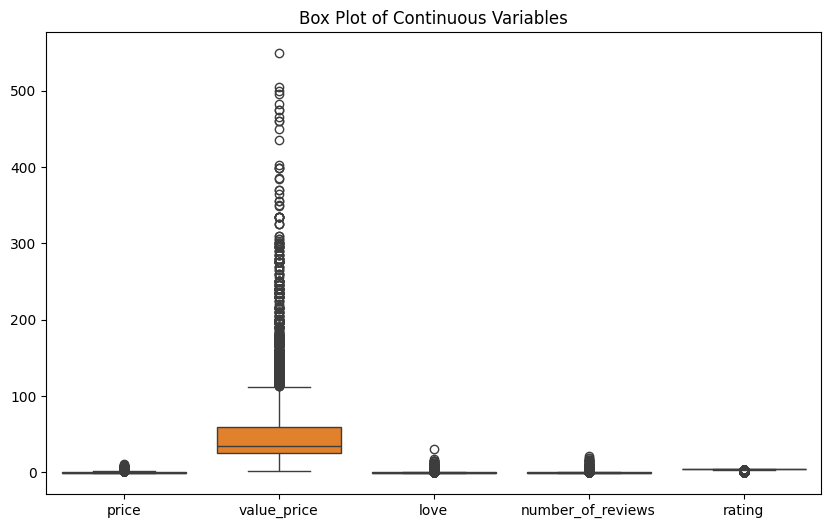

In [ ]:
# Box plots for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Box Plot of Continuous Variables')
plt.show()


* Price & Value Price: There are significant outliers, especially in value_price, indicating that some products are exceptionally expensive compared to the majority.
* Love: A few products have significantly higher love counts, marking them as outliers.
* Number of Reviews: Most values are clustered near zero, with some extreme outliers suggesting a few products receive a disproportionately high number of reviews.
* Rating: Ratings have a relatively narrow range, with a few outliers.

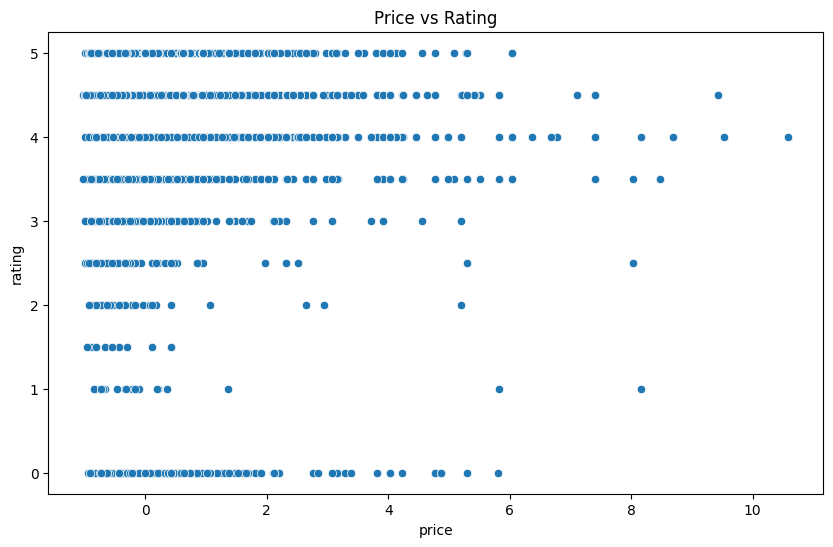

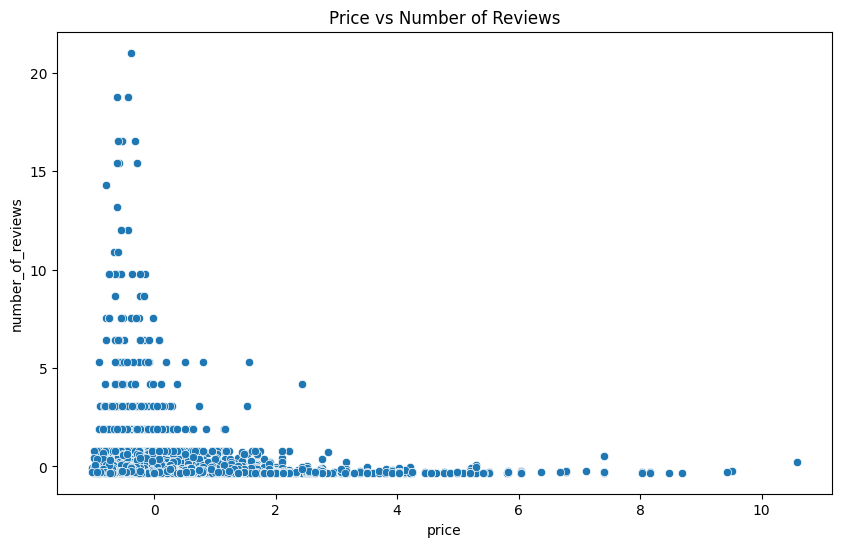

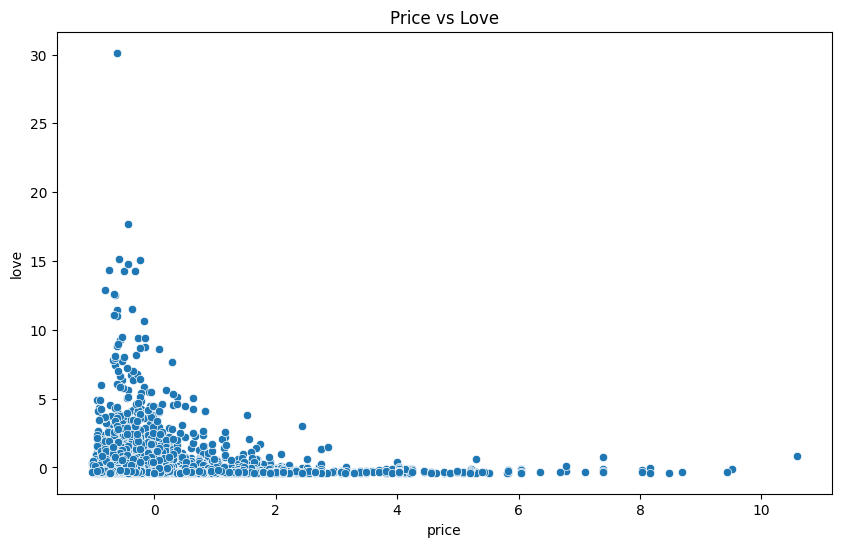

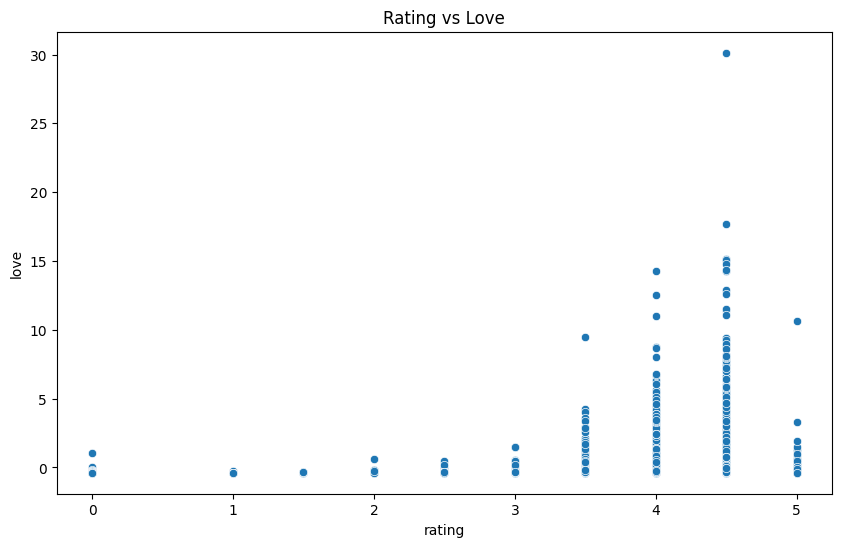

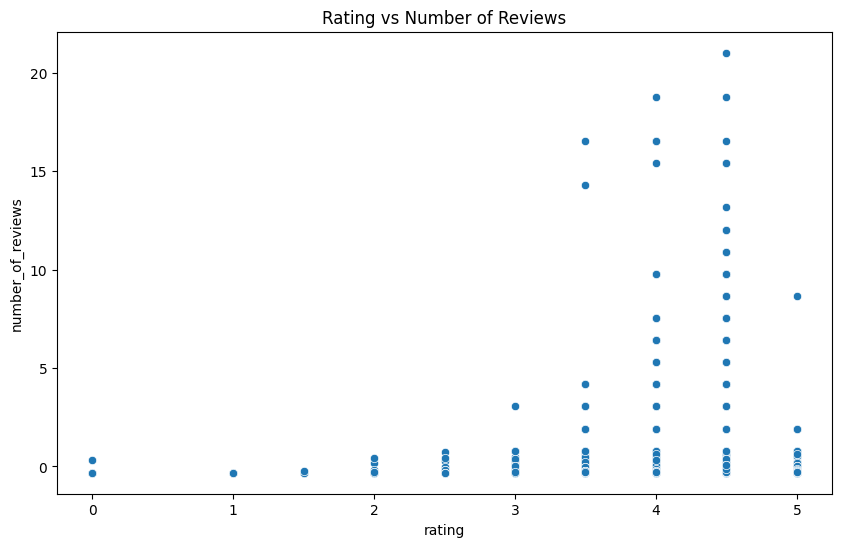

In [ ]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=data)
plt.title('Price vs Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data)
plt.title('Price vs Number of Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='love', data=data)
plt.title('Price vs Love')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='love', data=data)
plt.title('Rating vs Love')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='number_of_reviews', data=data)
plt.title('Rating vs Number of Reviews')
plt.show()

Observation:
1. Most products with low prices have fewer reviews, but there are a few expensive products with a high number of reviews. There is no obvious linear relationship.

2. Products with lower prices tend to have low love counts. However, some expensive products still receive high love counts, indicating mixed consumer engagement.

3. Higher-rated products are more likely to have a higher number of reviews, but there are exceptions. Some well-rated products still have few reviews.

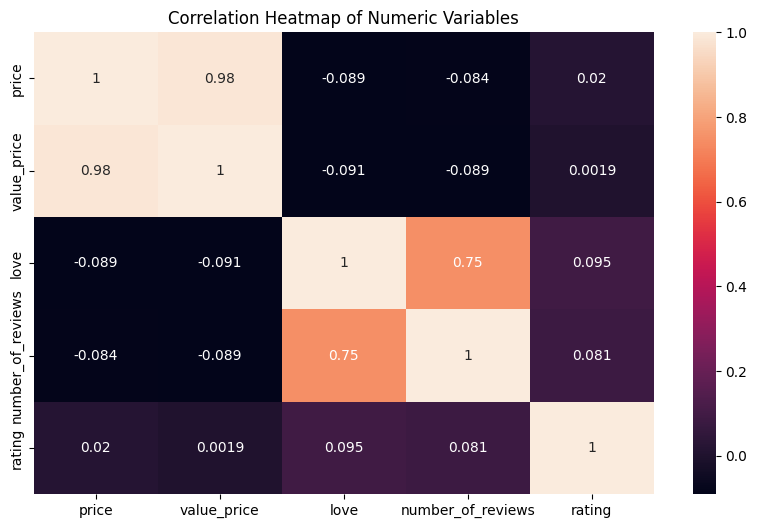

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


> price and value_price are highly correlated (0.98), suggesting redundancy. love and number_of_reviews also show a moderate positive correlation (0.75), indicating a potential relationship between these features.





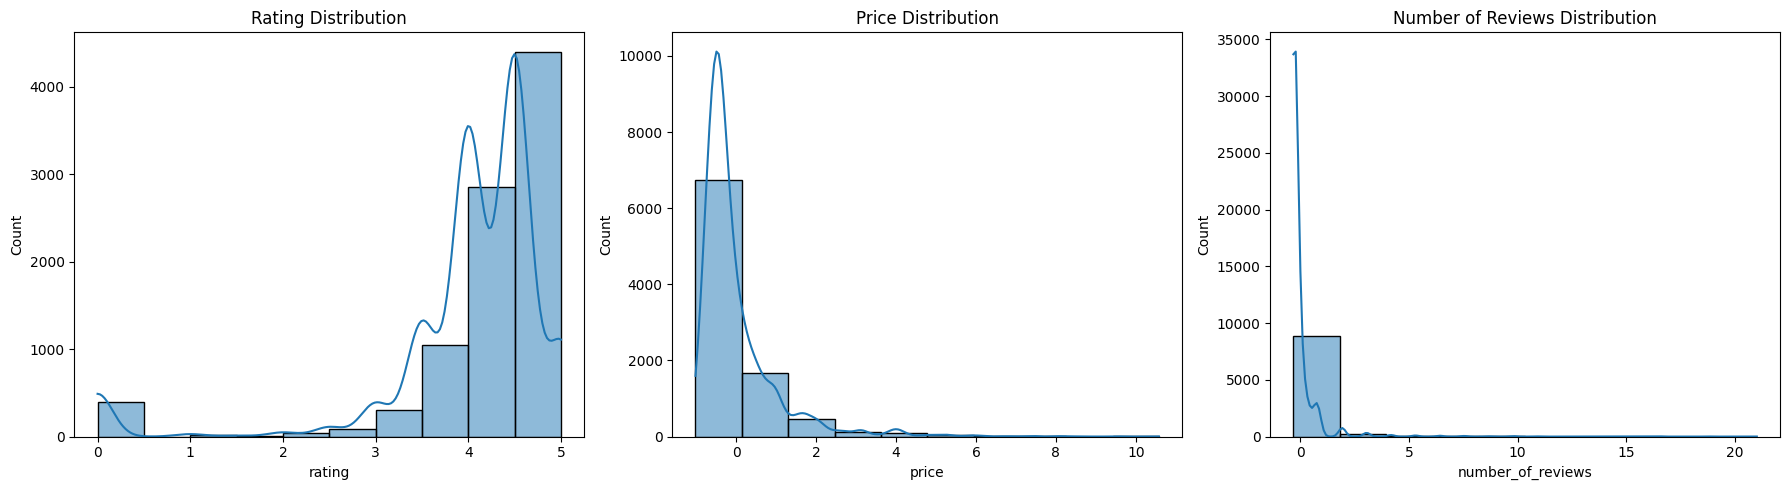

In [ ]:
# Distribution plots for key columns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['rating'], bins=10, kde=True, ax=axs[0]).set(title='Rating Distribution')
sns.histplot(data['price'], bins=10, kde=True, ax=axs[1]).set(title='Price Distribution')
sns.histplot(data['number_of_reviews'], bins=10, kde=True, ax=axs[2]).set(title='Number of Reviews Distribution')
plt.tight_layout()
plt.show()

* Rating: Ratings are mostly positive, centered around higher values, with a skew towards the upper end.
* Price: Prices are heavily skewed towards the lower end, with most products being affordable.
* Number of Reviews: The number of reviews is also skewed, with most products having few reviews and a small number having a significantly high count.

### Categorical Data Analysis

Text(0.5, 1.0, 'Top 10 Category')

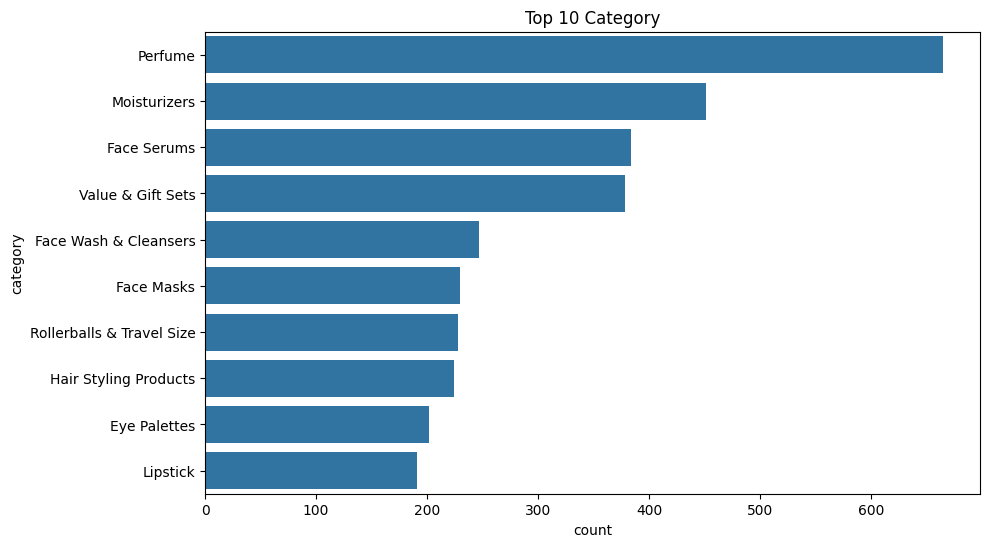

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().nlargest(10).index)
plt.title('Top 10 Category')

Text(0.5, 1.0, 'Top 10 Brands')

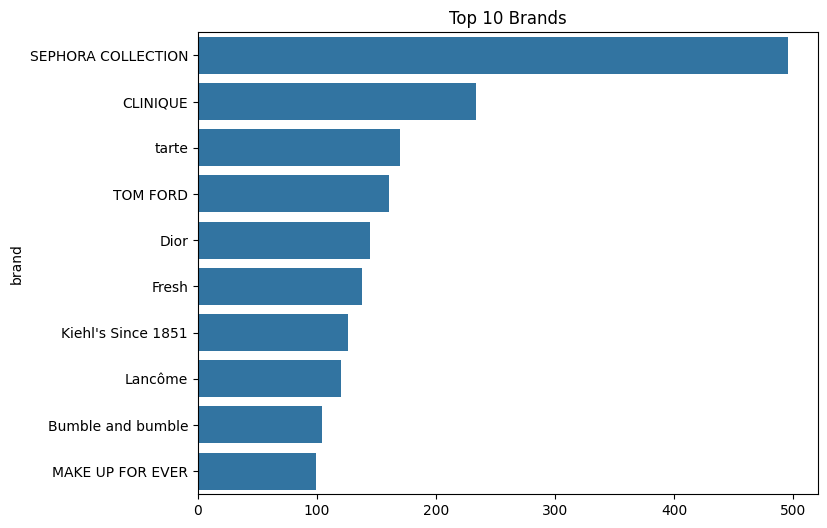

In [ ]:
top_brands = data['brand'].value_counts().nlargest(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_brands.index, x=top_brands.values)
plt.title('Top 10 Brands')

# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Extract total oz from 'size'

In [ ]:
data['size']

,size
0,5 x 0.16oz/5mL
1,0.7 oz/ 20 mL
2,5 oz/ 148 mL
3,2.5 oz/ 74 mL
4,5 x 0.16oz/5mL
...,...
9163,no size
9164,3 x 0.32 oz/ 9 g
9165,0.946 oz/ 28 mL
9166,no size


In [ ]:
def extract_total_oz(size_str):
    if pd.isnull(size_str):
        return np.nan

    size_str = size_str.lower().replace(' ', '').replace(',', '')

    # Handle 'no size' entries
    if size_str == 'nosize':
        return np.nan

    num_items = 1
    oz_per_item = np.nan

    # Regex pattern for multiple items, e.g., "5x0.16oz/5mL"
    pattern_mult = r'(?P<num>\d+)x(?P<oz>[\d\.]+)oz'

    # Regex pattern for single item, e.g., "0.7oz/20mL"
    pattern_single = r'(?P<oz>[\d\.]+)oz'

    # Try matching multiple items
    match = re.match(pattern_mult, size_str)
    if match:
        try:
            num_str = match.group('num')
            oz_str = match.group('oz')
            num_items = int(num_str) if num_str else 1
            oz_per_item = float(oz_str) if oz_str and oz_str != '.' else np.nan
        except ValueError:
            return np.nan
    else:
        # Try matching single item
        match = re.match(pattern_single, size_str)
        if match:
            try:
                oz_str = match.group('oz')
                oz_per_item = float(oz_str) if oz_str and oz_str != '.' else np.nan
            except ValueError:
                return np.nan
        else:
            # Handle entries like '3x.oz/5mL' where oz is missing
            # Attempt to extract oz using a more flexible pattern
            match_flex = re.search(r'(?P<oz>[\d\.]*)oz', size_str)
            if match_flex:
                oz_str = match_flex.group('oz')
                if oz_str and oz_str != '':
                    try:
                        oz_per_item = float(oz_str)
                    except ValueError:
                        oz_per_item = np.nan
                else:
                    oz_per_item = np.nan
            else:
                return np.nan

    # Calculate total ounces
    if not np.isnan(oz_per_item):
        total_oz = num_items * oz_per_item
    else:
        total_oz = np.nan

    return total_oz


In [ ]:
data['total_oz'] = data['size'].apply(extract_total_oz)

In [ ]:
mean_oz = data['total_oz'].mean()

# Fill NaN values with the mean ounces
data['total_oz'].fillna(mean_oz, inplace=True)

<ipython-input-24-566422c346fa>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_oz'].fillna(mean_oz, inplace=True)


In [ ]:
data['total_oz']

,total_oz
0,0.800000
1,0.700000
2,5.000000
3,2.500000
4,0.800000
...,...
9163,2.460905
9164,0.960000
9165,0.946000
9166,2.460905


### Major Preprocessing and Dropping unnecessary columns and handling categorical features, feature expansion

In [ ]:
data_filtered = data.drop(columns=['id', 'name', 'details', 'how_to_use', 'ingredients', 'options', 'MarketingFlags_content','size'])

# Splitting the features and target variable
X = data_filtered.drop(columns=['price', 'value_price','URL'])
y = data_filtered['price']

# Identifying categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['brand', 'category']
Numerical features: ['rating', 'number_of_reviews', 'love', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer', 'total_oz']


In [ ]:
# Scale numerical features
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Define the polynomial degree
degree = 2

# Numerical preprocessing with scaling and polynomial features
numerical_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('poly', PolynomialFeatures(degree=degree, include_bias=False))  # Add polynomial features
])

# Preprocessing for categorical features
categorical_preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_features),  # Use updated numerical preprocessor
        ('cat', categorical_preprocessor, categorical_features)
    ]
)

# Train first model

In [ ]:
print("Features used for prediction:")
print(X.columns.tolist())

Features used for prediction:
['brand', 'category', 'rating', 'number_of_reviews', 'love', 'MarketingFlags', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer', 'total_oz']


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge()

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define hyperparameter grid for Ridge regression (regularization strength)
param_grid = {
    'model__alpha': [0.1, 1, 10, 50, 100]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Making predictions with the best model
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Showing predictions vs actual values after tuning
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nComparison of Actual vs Predicted Prices (After Hyperparameter Tuning):")
print(results.head(10))

# Evaluating the model after hyperparameter tuning
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Outputting the evaluation results after tuning
print("Training MSE (After Tuning):", train_mse)
print("Test MSE (After Tuning):", test_mse)
print("Training R^2 Score (After Tuning):", train_r2)
print("Test R^2 Score (After Tuning):", test_r2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................................model__alpha=0.1; total time=   0.3s
[CV] END ...................................model__alpha=0.1; total time=   0.2s
[CV] END ...................................model__alpha=0.1; total time=   0.3s
[CV] END ...................................model__alpha=0.1; total time=   0.3s
[CV] END ...................................model__alpha=0.1; total time=   0.3s
[CV] END .....................................model__alpha=1; total time=   0.2s
[CV] END .....................................model__alpha=1; total time=   0.2s
[CV] END .....................................model__alpha=1; total time=   0.3s
[CV] END .....................................model__alpha=1; total time=   0.3s
[CV] END .....................................model__alpha=1; total time=   0.2s
[CV] END ....................................model__alpha=10; total time=   0.2s
[CV] END ....................................mode

In [ ]:
# Cross-validation for robustness
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mean_mse = -cv_scores.mean()
cv_std_mse = cv_scores.std()
print("\nCross-Validation MSE (Mean):", cv_mean_mse)
print("Cross-Validation MSE (Standard Deviation):", cv_std_mse)


Cross-Validation MSE (Mean): 0.7423356417510253
Cross-Validation MSE (Standard Deviation): 0.3162489437060201


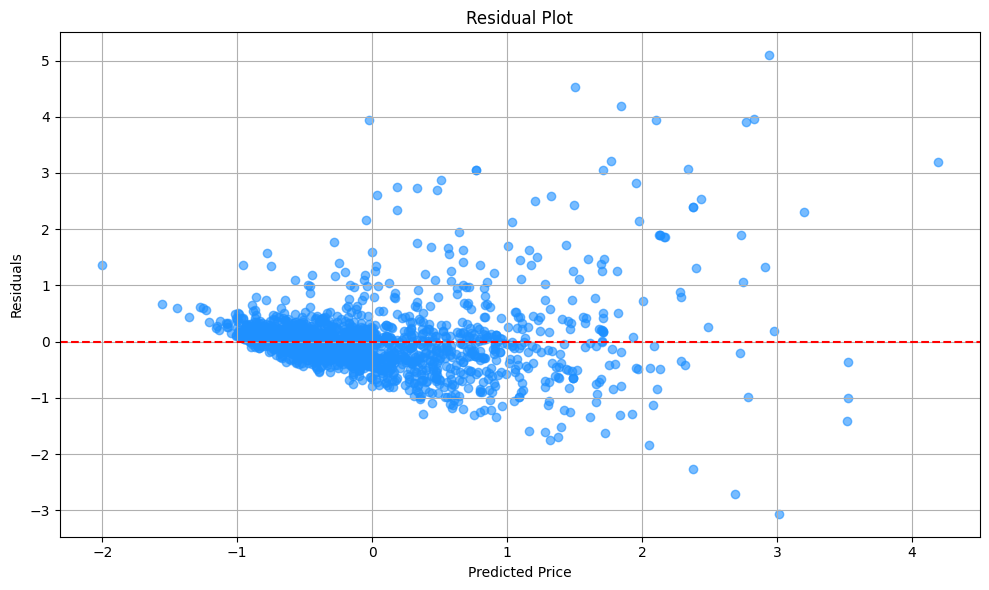

In [ ]:
# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='dodgerblue', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()



> The residual plot shows the difference between the actual values and the predicted values of our model. The residuals are scattered around the horizontal line at zero, which indicates that the errors have a roughly constant variance. However, the fan shape of the scatter indicates some heteroscedasticity, suggesting that our model may not perfectly fit the data, particularly as predicted values increase.



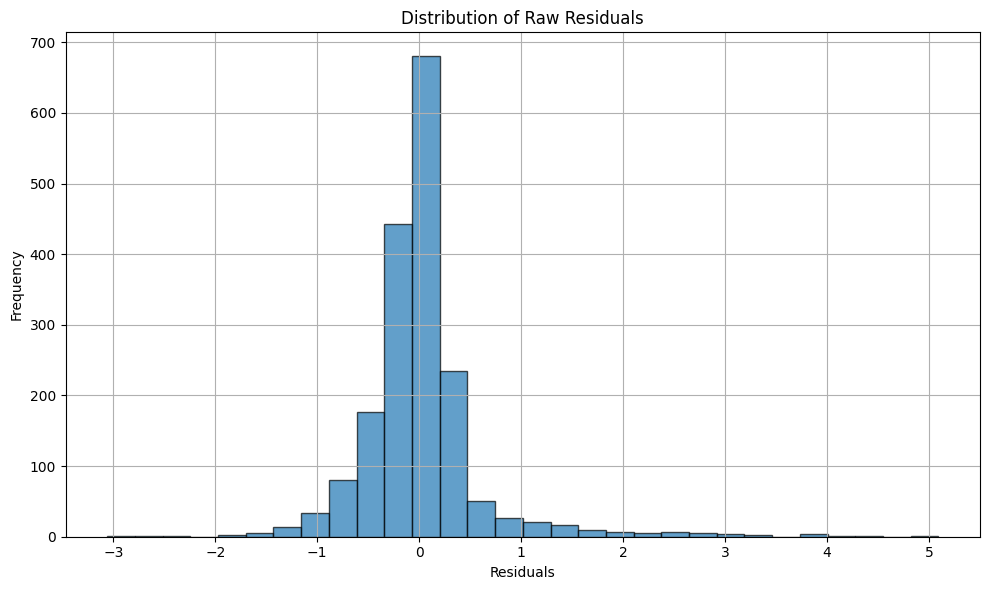

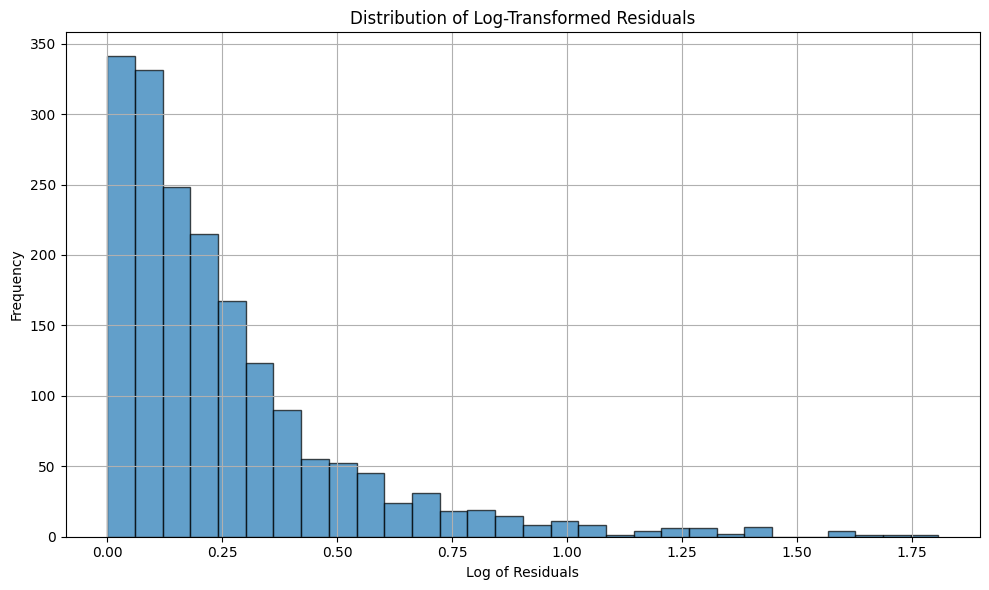

In [ ]:
# Update the log-transformed residual, to detect skewness

# Calculate residuals
residuals = y_test - y_test_pred

# Apply logarithmic transformation
log_residuals = np.log1p(np.abs(residuals))  # Use log(1 + |residual|)

# Plot raw residuals histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Raw Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot log-transformed residuals histogram
plt.figure(figsize=(10, 6))
plt.hist(log_residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Log of Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


> This histogram shows the frequency distribution of the residuals. The residuals appear to be centered around zero, which indicates that the model's predictions are unbiased on average. However, the spread and slight skewness of the residuals hint at potential issues with the model's assumptions about error distribution.

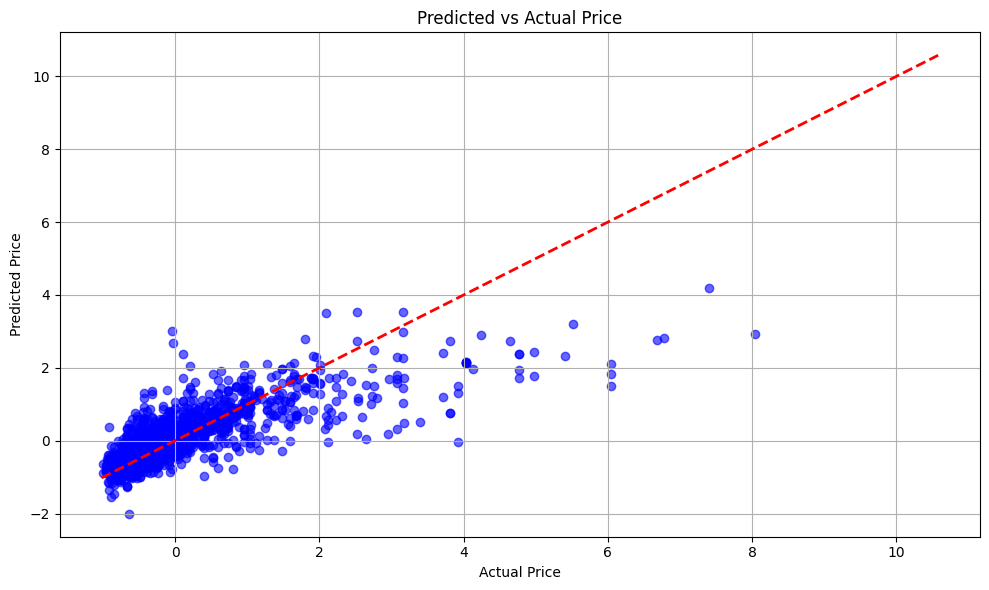

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')
plt.grid(True)
plt.tight_layout()
plt.show()

> This scatter plot compares the predicted prices to the actual prices. The red dashed line represents a perfect prediction (where predicted values would exactly match actual values). The spread around the line indicates the error in predictions, and it is clear that our model performs well for lower actual prices but has higher error for larger prices, as points deviate more from the line at higher values.

# Question:

Where does your model fit in the fitting graph?


Based on the residual plots and the predicted vs. actual plot, it appears that our model is in the middle range between underfitting and overfitting. The model shows reasonable performance in capturing the trend of the data, as indicated by the relatively low variance of residuals and the reasonable clustering around the line in the predicted vs. actual plot.

However, the scatter of residuals and the deviation of data points from the red dashed line at higher prices indicate that our model may be over-simplifying the relationships between features and the target variable. This suggests that while the model is not underfitting, it may not be capturing all the complex patterns in the data.

What are the next models you are thinking of and why?

* Polynomial Regression: Considering the non-linear pattern observed in the residual plot, incorporating a polynomial regression model may help capture more complex relationships between the features and the target variable.
* Tree-based Models (Random Forest Tree): Originally, we considered Decision Trees for our second model due to their ability to capture non-linear relationships, but after observing their tendency for overfitting and limited generalization capability, we transitioned to Random Forest to leverage ensemble learning capabilities while maintaining the advantages of tree-based models. Throughout this process, our model selection and tuning decisions were guided by the constant balance between model complexity and generalization capability.
* Support Vector Machines (SVMs): For a more refined approach, SVMs with different kernel functions could also be explored. Like price and satisfied is non-linear and complex, an SVM with an RBF kernel could be a good choice. This would allow the model to draw non-linear boundaries in the feature space to better classify satisfied outcomes.

### Conclusion
After applying Ridge Regression, the model showed improved generalization compared to the initial Multiple Linear Regression model. Ridge regularization helped prevent overfitting by penalizing large coefficients, resulting in more balanced performance across both the training and test datasets. While the training R² score decreased slightly to 0.6434 (compared to the baseline), the test R² score improved to 0.6257, indicating better generalization to unseen data. The training MSE (0.3590) and test MSE (0.3644) were similar, suggesting that the Ridge Regression model managed the complexity of the data without overfitting.

The residuals, although close to normal, exhibited some slight patterns, and the predicted vs. actual plot revealed deviations, particularly at higher prices. This indicates that, while the model performs adequately in most areas, there are still some underlying complexities in the data that remain unaddressed. To further improve the model's predictive accuracy, we plan to explore non-linear models, such as Polynomial Regression, which might help capture more intricate relationships between the features and the target variable. We plan to experiment with Support Vector Machines (SVMs), using different kernels, to refine the model's performance. Addressing outliers or skewed values might further improve the model's robustness and reduce prediction errors.

# Train the second Model (Random Forest Tree)

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv(csv_file_path)

#### preprocess

In [ ]:
numerical_features = ['number_of_reviews', 'love']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# preprocess for category col
data['category'] = data['category'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

#### redo size

In [ ]:
import re
def parse_size(size):
    if size == 'no size':
        return 0  # Replace 'no size' with 0
    # Match numeric values followed by "mL"
    ml_match = re.search(r'(\d+(?:\.\d+)?)\s*mL', size)
    if ml_match:
        return float(ml_match.group(1))
    # Convert oz to mL if "oz" is present
    oz_match = re.search(r'(\d+(?:\.\d+)?)\s*oz', size)
    if oz_match:
        oz_to_ml = float(oz_match.group(1)) * 29.5735  # 1 oz = 29.5735 mL
        return oz_to_ml
    return 0


data['size_ml'] = data['size'].apply(parse_size)


#### one hot encode in brand and category column

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['brand', 'category']

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply OneHotEncoder
encoded_categorical = onehot_encoder.fit_transform(data[categorical_features])

# Convert back to a DataFrame for better interpretability
encoded_categorical_df = pd.DataFrame(
    encoded_categorical,
    columns=onehot_encoder.get_feature_names_out(categorical_features)
)

# Concatenate the encoded columns and drop brand category
data = pd.concat([data.reset_index(drop=True), encoded_categorical_df], axis=1).drop(columns=categorical_features)

In [ ]:
data_filtered = data.drop(columns=['id', 'name', 'details', 'how_to_use', 'ingredients', 'options', 'MarketingFlags_content', 'size', 'value_price', 'URL'])

# Splitting the features and target variable
X = data_filtered.drop(columns=['price'])
y = data_filtered['price']
y = np.log1p(y)
data_filtered.head()

,rating,number_of_reviews,love,price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer,size_ml,...,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_Wellness,category_no category
0,4.0,4,3002,66.0,True,1,0,0,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.5,76,2700,66.0,True,1,0,0,0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.5,26,2600,180.0,True,1,0,0,0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.5,23,2900,120.0,True,1,0,0,0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.5,2,943,72.0,True,1,0,0,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_filtered.shape

(9168, 477)

In [ ]:
data_filtered.dtypes

,0
rating,float64
number_of_reviews,int64
love,int64
price,float64
MarketingFlags,bool
...,...
category_Toners,float64
category_Tweezers & Eyebrow Tools,float64
category_Value & Gift Sets,float64
category_Wellness,float64


## Hyperparameter Tunning

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestRegressor

model_pipeline = Pipeline([
    ('model', RandomForestRegressor(random_state=42)) 
])

param_grid = {
    'model__max_depth': [ 10, 20],        # 20
    'model__min_samples_split': [10, 25],       # 10
    'model__min_samples_leaf': [2, 10],             # 2
    # 'model__max_leaf_nodes': [30, 40, 50, None],    # None
    # 'model__ccp_alpha': [0.001, 0.01]               # 0.001
}

# Initialize GridSearchCV
random_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# Predict on the training set
y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
# train_r2 = r2_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
# test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse},Test MSE: {test_mse}")
gap = (test_mse - train_mse)/train_mse
print(f"Gap: {gap}")

Training MSE: 0.16110851472616988,Test MSE: 0.19684846102239173
Gap: 0.22183772444906277


### Retrain the model with top feature

    -selecting features whose importance score is greater than 0.05.

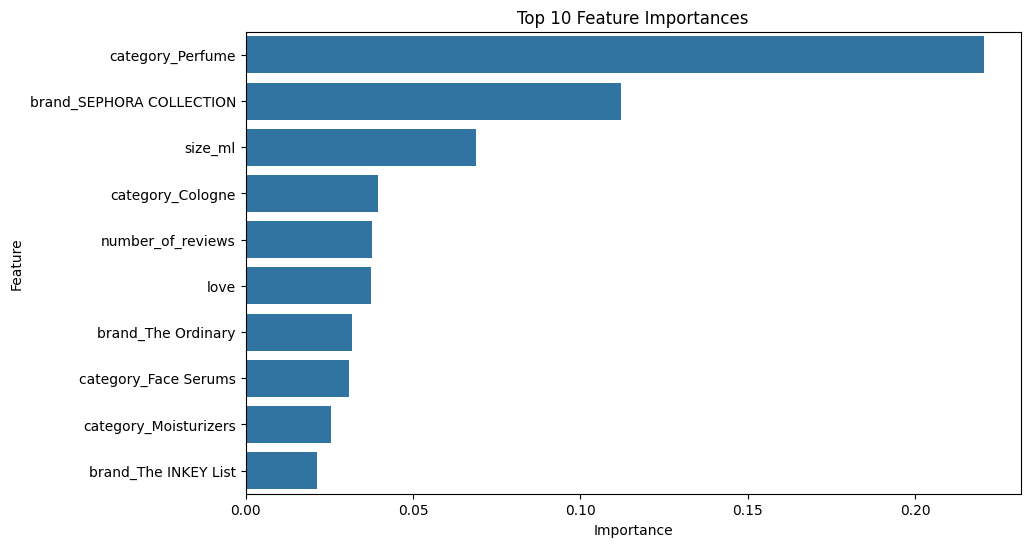

Index(['rating', 'number_of_reviews', 'love', 'MarketingFlags', 'online_only',
       'exclusive', 'limited_edition', 'limited_time_offer', 'size_ml',
       'brand_8Greens',
       ...
       'category_Spa Tools', 'category_Sponges & Applicators',
       'category_Sunscreen', 'category_Teeth Whitening',
       'category_Tinted Moisturizer', 'category_Toners',
       'category_Tweezers & Eyebrow Tools', 'category_Value & Gift Sets',
       'category_Wellness', 'category_no category'],
      dtype='object', length=476)

In [ ]:
feature_importances = best_model.named_steps['model'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


In [ ]:
# Select top features
top_features = importance_df[importance_df['Importance'] > 0.05]['Feature']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [ ]:
# Retrain with top features
random_search.fit(X_train_top, y_train)
y_test_pred_top = random_search.best_estimator_.predict(X_test_top)

# Evaluate the model with top features
train_mse_top = mean_squared_error(y_train, random_search.best_estimator_.predict(X_train_top))
test_mse_top = mean_squared_error(y_test, y_test_pred_top)
gap_top = (test_mse_top - train_mse_top) / train_mse_top * 100

print(f"Training MSE (Top Features): {train_mse_top}")
print(f"Test MSE (Top Features): {test_mse_top}")
print(f"MSE Gap (Top Features): {gap_top:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training MSE (Top Features): 0.31251310762631257
Test MSE (Top Features): 0.33825765613915965
MSE Gap (Top Features): 8.24%


## Visualization

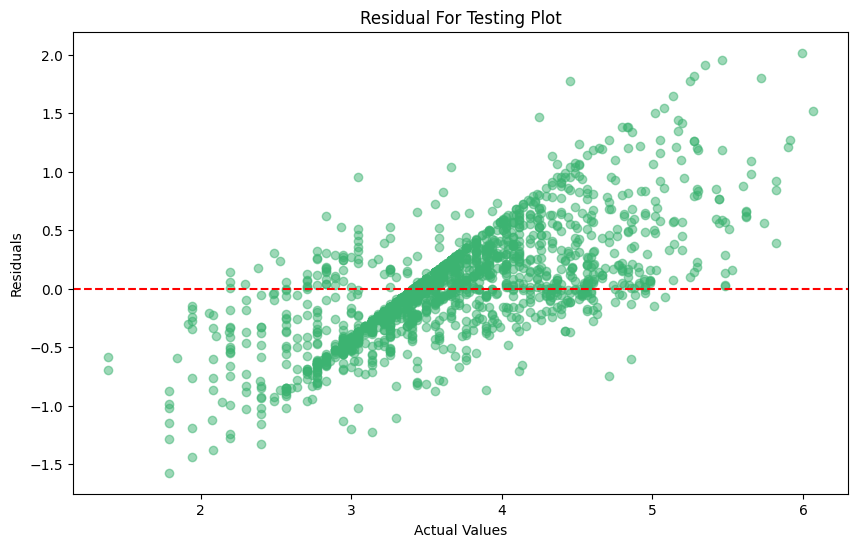

In [ ]:
# Plotting Residuals
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5,color='mediumseagreen')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual For Testing Plot')
plt.show()

The **training MSE**...

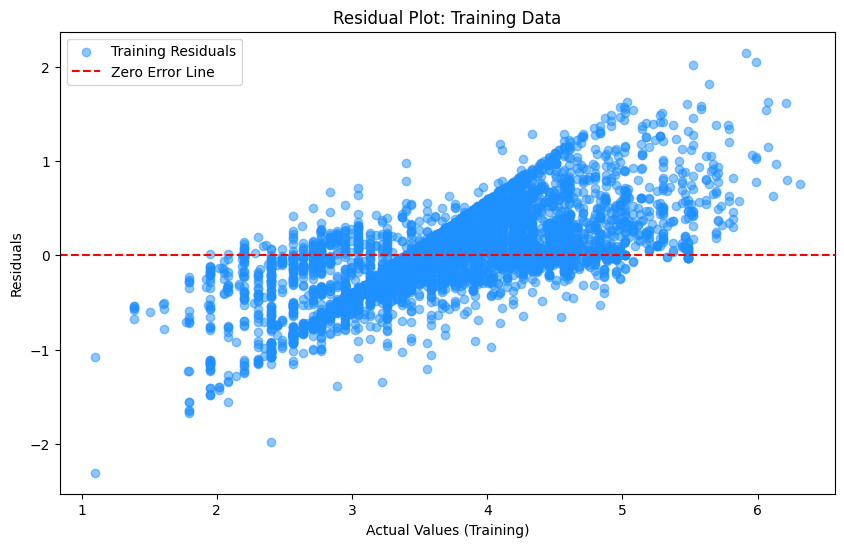

In [ ]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot training residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_residuals, alpha=0.5, color='dodgerblue', label='Training Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Residuals')
plt.title('Residual Plot: Training Data')
plt.legend()
plt.show()

The testing Mse

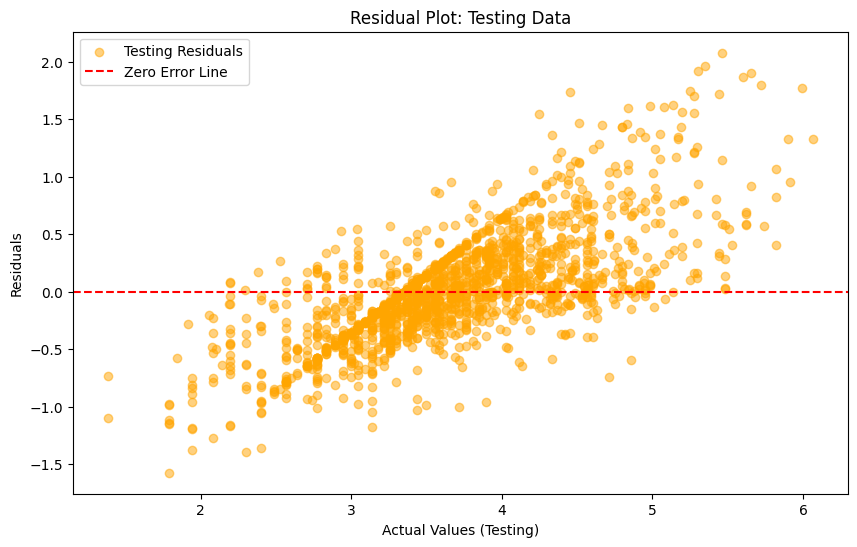

In [ ]:

# Plot testing residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_residuals, alpha=0.5, color='orange', label='Testing Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Residuals')
plt.title('Residual Plot: Testing Data')
plt.legend()
plt.show()

The **Actual vs Predicted Values** ...

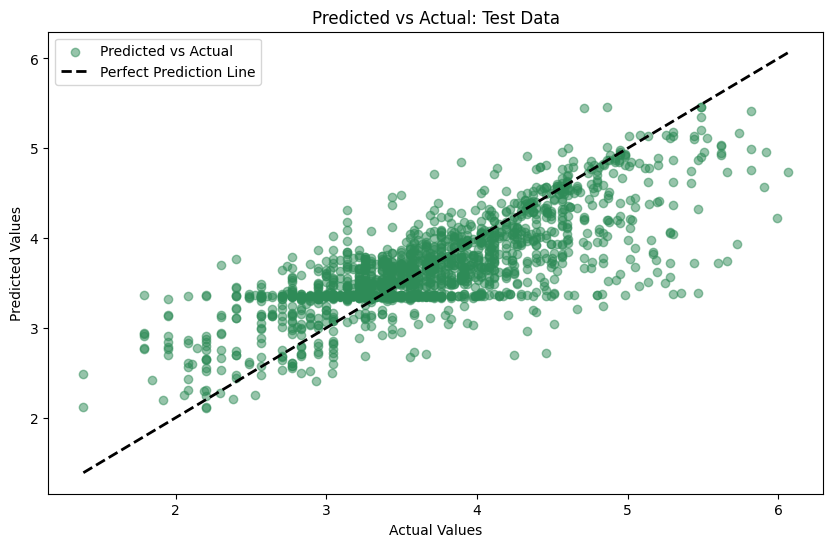

In [ ]:

# Plot predictions vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='seagreen', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual: Test Data')
plt.legend()
plt.show()

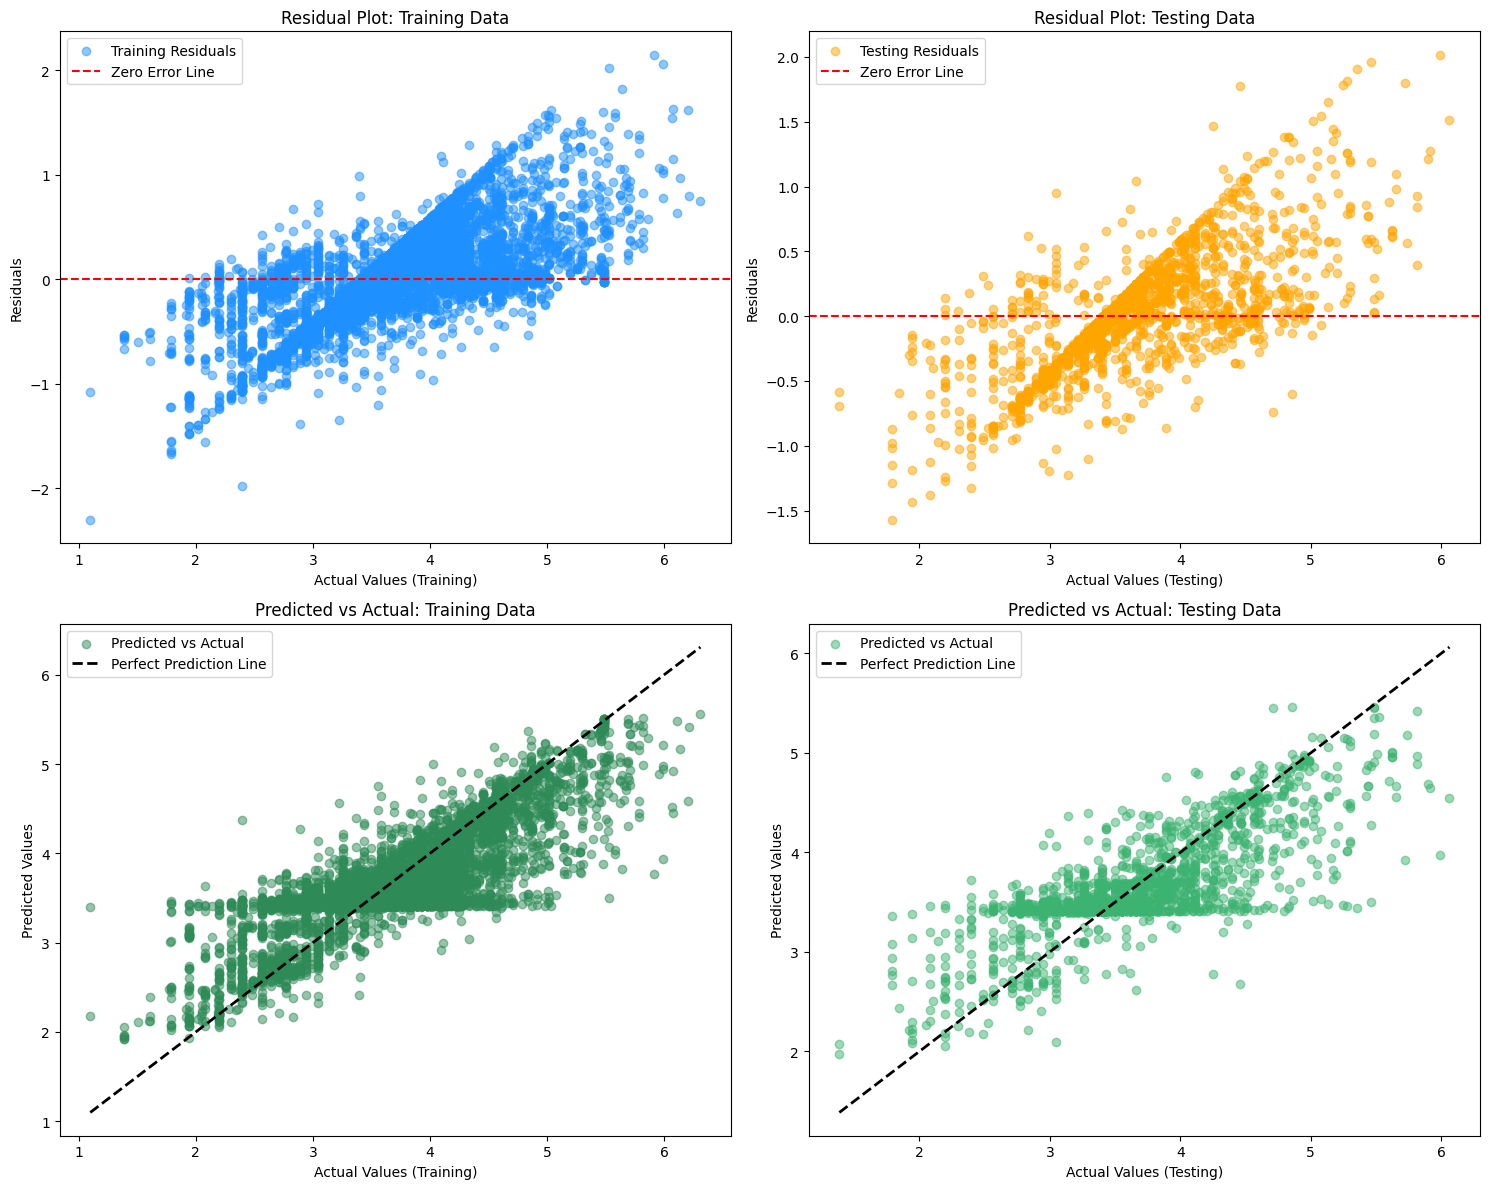

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Residuals for Training Data
axes[0, 0].scatter(y_train, train_residuals, alpha=0.5, color='dodgerblue', label='Training Residuals')
axes[0, 0].axhline(0, color='red', linestyle='--', label='Zero Error Line')
axes[0, 0].set_title('Residual Plot: Training Data')
axes[0, 0].set_xlabel('Actual Values (Training)')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].legend()

# Residuals for Testing Data
axes[0, 1].scatter(y_test, test_residuals, alpha=0.5, color='orange', label='Testing Residuals')
axes[0, 1].axhline(0, color='red', linestyle='--', label='Zero Error Line')
axes[0, 1].set_title('Residual Plot: Testing Data')
axes[0, 1].set_xlabel('Actual Values (Testing)')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].legend()

# Predicted vs Actual for Training Data
axes[1, 0].scatter(y_train, y_train_pred, alpha=0.5, color='seagreen', label='Predicted vs Actual')
axes[1, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Perfect Prediction Line')
axes[1, 0].set_title('Predicted vs Actual: Training Data')
axes[1, 0].set_xlabel('Actual Values (Training)')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].legend()

# Predicted vs Actual for Testing Data
axes[1, 1].scatter(y_test, y_test_pred, alpha=0.5, color='mediumseagreen', label='Predicted vs Actual')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
axes[1, 1].set_title('Predicted vs Actual: Testing Data')
axes[1, 1].set_xlabel('Actual Values (Testing)')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()



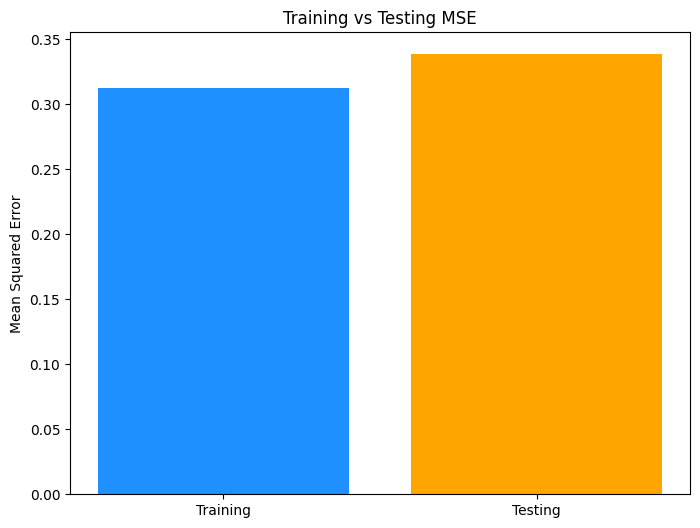

In [ ]:
import matplotlib.pyplot as plt

# Example training and testing errors
training_mse = 0.3125
testing_mse = 0.3383
labels = ['Training', 'Testing']
errors = [training_mse, testing_mse]

# Plotting the errors
plt.figure(figsize=(8, 6))
plt.bar(labels, errors, color=['dodgerblue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Training vs Testing MSE')
plt.show()


## **Questions**:

**Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?**


 - Where does your model fit in the fitting graph?
  The relatively small MSE gap (8.24%) indicates that the model is well-fitted and generalizes well to unseen data. This suggests the model is neither overfitting nor underfitting, fitting squarely in the "ideal" region of a fitting graph.


- What are the next models you are thinking of and why?
  Our next model would consider Support Vector Regressor (SVR)
  Because SVR is effective for small to medium-sized datasets and can model non-linear relationships using kernels like RBF or polynomial.
  It focuses on minimizing a margin around the predictions rather than optimizing for absolute accuracy. Next step would be:
  Test SVR with RBF kernel and tune hyperparameters like C (regularization) and gamma (kernel coefficient).





##  **Conclusion section**

What is the conclusion of your 2nd model? What can be done to possibly improve it? Note: The conclusion section should be it's own independent section. i.e. Methods: will have models 1 and 2 methods, Conclusion: will have models 1 and 2 results and discussion.

**First Model: Multiple Linear Regression**

*   The Ridge Regression model, after hyperparameter tuning, demonstrated a reasonable ability to capture the variance in the training data, as reflected by the Training R² Score of 0.643 and Training MSE of 0.359. However, its performance on the test set was slightly weaker, with a Test R² Score of 0.626 and Test MSE of 0.364, suggesting some overfitting. The residual plot displayed a potential issue of heteroscedasticity, indicating that the model may not fully account for increasing variance as predicted values increase. Additionally, the predicted vs. actual plot showed that the model performs better for lower values of the target variable, with higher errors for larger prices.
*   **Improvement Plan:**
To improve the model, we will explore polynomial regression to capture non-linear relationships, and investigate tree-based models like decision trees or random forests for better handling of complex interactions. Additionally, we will consider Support Vector Machines with RBF kernels to model non-linear boundaries and test regularization techniques such as Lasso and ElasticNet to reduce overfitting and enhance generalization.

**Second Model: Decision Tree Regressor**

*   The Random Forest Regressor demonstrated improved performance compared to a single Decision Tree. The initial model achieved a Training MSE of 0.1492 and Test MSE of 0.2076, indicating better generalization with a reduced gap between training and test errors (approximately 39.2%). Further refinement involved selecting features with importance scores greater than 0.05, reducing the feature space and retraining the model. This step maintained predictive accuracy while improving interpretability. Residual analysis showed reduced variance and more uniform distribution, while the actual vs. predicted plot indicated better alignment with the diagonal line. These results suggest that Random Forest is more robust and capable of capturing complex patterns in the data compared to a single Decision Tree, with less overfitting.
*   **Improvement Plan:**
To further enhance performance, increasing the number of trees in the Random Forest, fine-tuning hyperparameters such as max_features and n_estimators, and experimenting with Gradient Boosting methods may yield better results. Additionally, exploring advanced feature engineering techniques, expanding the dataset, and incorporating domain-specific knowledge could improve the model's ability to generalize, particularly for outlier or higher-value predictions.